# Evaluating Regression Models 

First things first, wrote the setting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
import statsmodels.api as sm
import wrangle 

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score
from env import host, user, password
from pydataset import data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


## 1. Load your zillow dataset.

### Acquire

In [2]:
df = wrangle.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
df.shape

(2152863, 7)

In [4]:
df = wrangle.prep_zillow()
df.head()

AttributeError: module 'wrangle' has no attribute 'prep_zillow'

In [5]:
df = wrangle.wrangle_zillow()
df.head()

,bedcount,bathcount,sqft,tax_value,yearbuilt,taxamount,fips
4,4.0,2.0,3633,296425.0,2005,6941.39,6037
6,3.0,4.0,1620,847770.0,2011,10244.94,6037
7,3.0,2.0,2077,646760.0,1926,7924.68,6037
11,0.0,0.0,1200,5328.0,1972,91.60,6037
14,0.0,0.0,171,6920.0,1973,255.17,6037


In [6]:
df = wrangle.dtype_zillow()
df.info()

AttributeError: module 'wrangle' has no attribute 'dtype_zillow'

In [7]:
df.shape

(2140235, 7)

In [8]:
train, validate, test = wrangle.split_zillow(df)

In [9]:
print(f"train: {train.shape}")
print(f"validate: {validate.shape}")
print(f"test: {test.shape}")

train: (1284141, 7)
validate: (428047, 7)
test: (428047, 7)


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt (tax_value using only calculatedfinishedsqft (sqft).

Fit an OLS regression model using the sqft feature to predict tax_value. Compute the predicted values (yhat) for the tax_value using the trained model.

In [10]:
y=train["tax_value"] #target
x=train["sqft"] # measured feature


In [11]:
X_train = train['sqft']
y_train = train['tax_value']

X_validate = validate['sqft']
y_validate = validate['tax_value']

X_test = test['sqft']
y_test = test['tax_value']

In [12]:
X_train.head()

600291      919
1465690    1892
2009603    2224
2088361    1409
1181326    1059
Name: sqft, dtype: int64

In [13]:
y_train

600291     363438.0
1465690    629340.0
2009603    388825.0
2088361    224380.0
1181326    632000.0
             ...   
952416     196932.0
1546741    218143.0
1084823    264198.0
593805     173244.0
979682     184094.0
Name: tax_value, Length: 1284141, dtype: float64

 Turn into one dimensional arrays

In [14]:
# assuming X and y are already defined
model = LinearRegression().fit(x, y)
predictions = model.predict(x)

ValueError: Expected 2D array, got 1D array instead:
array=[ 919 1892 2224 ... 1219 1897 1020].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Plot residuals for linear regression models

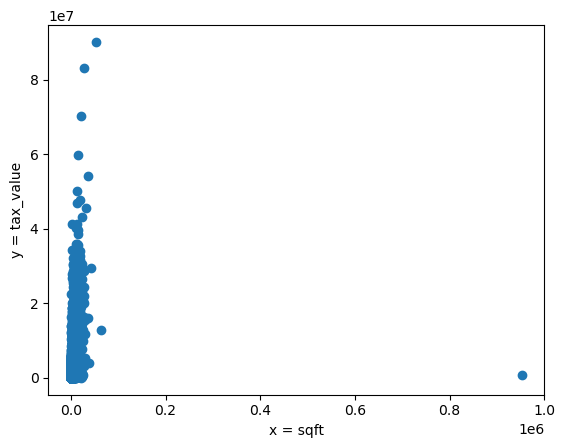

In [15]:
# look at scatter of x vs y
plt.scatter(x, y)
plt.xlabel('x = sqft')
plt.ylabel('y = tax_value');

Scatterplot shows outliers houses of 20k calculated finished square feet

In [16]:
baseline = y.mean()
baseline

460702.5635814136

In [17]:
train['baseline'] = y.mean()
train.head()

,bedcount,bathcount,sqft,tax_value,yearbuilt,taxamount,fips,baseline
600291,3.0,1.0,919,363438.0,1953,4563.12,6059,460702.563581
1465690,4.0,3.0,1892,629340.0,1950,7585.83,6037,460702.563581
2009603,4.0,2.0,2224,388825.0,1964,4679.10,6037,460702.563581
2088361,3.0,2.0,1409,224380.0,1949,3091.22,6037,460702.563581
1181326,3.0,1.0,1059,632000.0,1952,7247.50,6059,460702.563581


In [18]:
baseline = train.tax_value.mean()
baseline

460702.5635814136

In [19]:
train['baseline'] = train.tax_value.mean()
train.head()

,bedcount,bathcount,sqft,tax_value,yearbuilt,taxamount,fips,baseline
600291,3.0,1.0,919,363438.0,1953,4563.12,6059,460702.563581
1465690,4.0,3.0,1892,629340.0,1950,7585.83,6037,460702.563581
2009603,4.0,2.0,2224,388825.0,1964,4679.10,6037,460702.563581
2088361,3.0,2.0,1409,224380.0,1949,3091.22,6037,460702.563581
1181326,3.0,1.0,1059,632000.0,1952,7247.50,6059,460702.563581


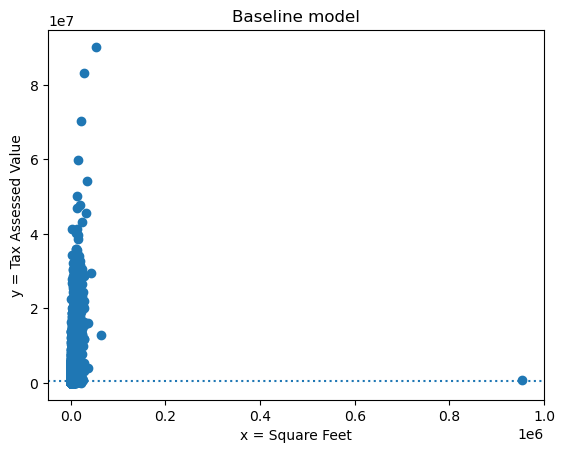

In [20]:
plt.scatter(train.sqft, train.tax_value)
plt.axhline(train.tax_value.mean(), ls = ':')
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('Baseline model');

Scatterplot shows outliers houses of 20k square feet

In [21]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 919 1892 2224 ... 1219 1897 1020].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
train['yhat'] = predictions

NameError: name 'predictions' is not defined

In [23]:
train.head()

,bedcount,bathcount,sqft,tax_value,yearbuilt,taxamount,fips,baseline
600291,3.0,1.0,919,363438.0,1953,4563.12,6059,460702.563581
1465690,4.0,3.0,1892,629340.0,1950,7585.83,6037,460702.563581
2009603,4.0,2.0,2224,388825.0,1964,4679.10,6037,460702.563581
2088361,3.0,2.0,1409,224380.0,1949,3091.22,6037,460702.563581
1181326,3.0,1.0,1059,632000.0,1952,7247.50,6059,460702.563581


AttributeError: 'DataFrame' object has no attribute 'yhat'

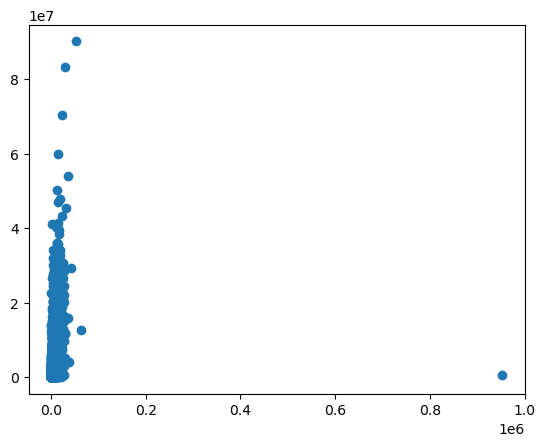

In [24]:
# visualize the line of best fit from OLS linear model
plt.scatter(train.sqft, train.tax_value)
plt.plot(train.sqft, train.yhat)
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('OLS linear model');

## 3. Plot the residuals for the linear regression model that you made.

In [25]:
train.head()

,bedcount,bathcount,sqft,tax_value,yearbuilt,taxamount,fips,baseline
600291,3.0,1.0,919,363438.0,1953,4563.12,6059,460702.563581
1465690,4.0,3.0,1892,629340.0,1950,7585.83,6037,460702.563581
2009603,4.0,2.0,2224,388825.0,1964,4679.10,6037,460702.563581
2088361,3.0,2.0,1409,224380.0,1949,3091.22,6037,460702.563581
1181326,3.0,1.0,1059,632000.0,1952,7247.50,6059,460702.563581


In [26]:
# residual = actual - predicted
train['residual'] = train.tax_value - train.yhat
train['baseline_residual'] = train.tax_value - train.baseline

AttributeError: 'DataFrame' object has no attribute 'yhat'

In [27]:
train.head()

,bedcount,bathcount,sqft,tax_value,yearbuilt,taxamount,fips,baseline
600291,3.0,1.0,919,363438.0,1953,4563.12,6059,460702.563581
1465690,4.0,3.0,1892,629340.0,1950,7585.83,6037,460702.563581
2009603,4.0,2.0,2224,388825.0,1964,4679.10,6037,460702.563581
2088361,3.0,2.0,1409,224380.0,1949,3091.22,6037,460702.563581
1181326,3.0,1.0,1059,632000.0,1952,7247.50,6059,460702.563581


Negative Residual = Prediction  high the actual observed value is lower than the predicted value. In other words, the prediction is higher than the actual value. This indicates that the model has overestimated the target variable.
<br>
Positive Residual = Prediction too low

AttributeError: 'DataFrame' object has no attribute 'baseline_residual'

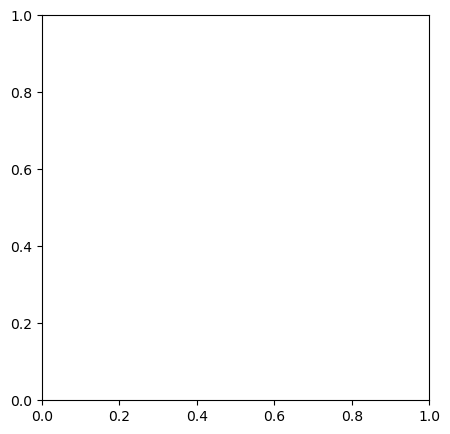

In [28]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.sqft, train.baseline_residual)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.sqft, train.residual)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [29]:
baseline_residual_min = train.baseline_residual.min()
baseline_residual_max = train.baseline_residual.max()
residual_min = train.residual.min()
residual_max = train.residual.max()

AttributeError: 'DataFrame' object has no attribute 'baseline_residual'

In [30]:
residual_min, residual_max

NameError: name 'residual_min' is not defined

AttributeError: 'DataFrame' object has no attribute 'baseline_residual'

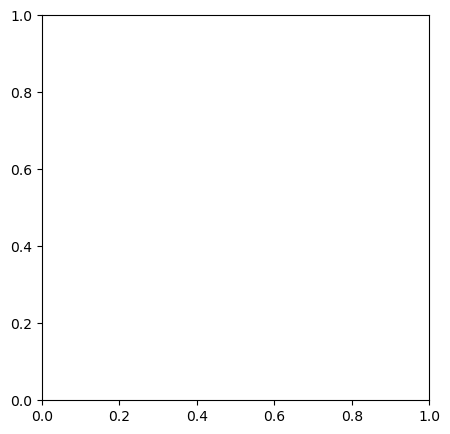

In [31]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.sqft, train.baseline_residual, alpha=.05)
plt.axhline(y = 0, ls = ':', color = 'red')
plt.xlim(0,5000)
plt.ylim(baseline_residual_min().astype(np.int64), baseline_residual.max().astype(np.int64))
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.sqft, train.residual, alpha=0.05)
plt.axhline(y = 0, ls = ':', color ='red')

plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals')
print("Negative Residual = Prediction too high")
print("Positive Residual = Prediction too low")

## FINDINGS
- Residual plot slope implies need for more predictors.

In [32]:
# Residual plot (y vs residual)
actual = train.tax_value
predicted = train.yhat
residuals = actual - predicted
plt.hlines(0, actual.min(), actual.max(), ls=':')
plt.scatter(actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'yhat'

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [33]:
train['residual^2'] = train.residual**2
train['baseline_residual^2'] = train.baseline_residual**2

train.head()

AttributeError: 'DataFrame' object has no attribute 'residual'

<b>
    Calculating SSE
</b>

In [34]:
SSE = train['residual^2'].sum()
SSE_baseline = train['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

KeyError: 'residual^2'

In [ ]:
SSE < SSE_baseline

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tax value amount).

<b>
    
Calculating MSE

</b>

In [ ]:
len(train)
train.shape[0]

In [ ]:
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

<b>
    
Calculating RMSE

</b>

In [ ]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [ ]:
if SSE < SSE_baseline:
    print('OLS Regression Model Performs Better than Baseline')
else:
    print('OLS Regression Model Performs Worse than Baseline')

## 7. What is the amount of variance explained in your model?

In [ ]:
# calculate R2 manually:

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline = train['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = train['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

In [ ]:
# calculate R2 the easy way:

from sklearn.metrics import r2_score
r2_score(train.tax_value, train.yhat)

## 8. Is your model better than the baseline model?

In [ ]:
X2 = sm.add_constant(train.sqft)
est = sm.OLS(train.tax_value, X2)
est2 = est.fit()
print(est2.summary())

The OLS Regression Model outperformed the baseline model on the test set using RMSE as the evaluation metric. The RMSE for the OLS Regression Model was 272,306.6, while the baseline model had an RMSE of 313,748.0.

Despite the improvement over the baseline, the OLS Regression Model still does a poor job of accurately predicting home prices. The level of error, with a difference of hundreds of thousands of dollars, would be considered unacceptable for any buyer or seller relying on accurate price estimates.




## 9. Create a file named evaluate.py that contains the following functions.

In [ ]:
def plot_residuals(df, y, yhat):
    '''
    This function takes in actual value and predicted value 
    then creates a scatter plot
    '''
    # residuals
    df['residuals'] = df[y] - df[yhat]
    
    fig, ax = plt.subplots(figsize=(13, 7))
    ax.hist(df.residuals, label='model residuals', alpha=.6)
    ax.legend()
    return
    

In [ ]:
def regression_errors(df, y, yhat):
    '''
    This function takes in actual value and predicted value 
    then outputs: the sse, ess, tss, mse, and rmse
    '''
    df['residuals']= df[y]- df[yhat]
    sse = (df.residuals **2).sum()
    ess= ((df[yhat] - df[y].mean()) **2).sum()
    tss = ((df[y]- df[y].mean())**2).sum()
    n = df.shape[0]
    mse = sse/n
    rmse = math.sqrt(mse)

    print(f''' 
        sse: {sse: .4f}
        ess: {ess: .4f}
        tss: {tss: .4f}
        mse: {mse: .4f}
        rmse: {rmse: .4f}
        ''')


def baseline_mean_errors(df, y, yhat):
    '''
    This function takes in actual value and predicted value
    then outputs: the SSE, MSE, and RMSE for the baseline model
    '''
    df['residuals_baseline']= df[y]- df[yhat]
    sse_baseline = (df.residuals_baseline **2).sum()
    n = df.shape[0]
    mse_baseline = sse_baseline/n
    rmse_baseline = math.sqrt(mse_baseline)

    print(f''' 
        sse_baseline: {sse_baseline: .4f}
        mse_baseline: {mse_baseline: .4f}
        rmse_baseline: {rmse_baseline: .4f}
        ''')

def better_than_baseline(actual, predicted):
     '''
    This function takes in actual value and predicted value
    then returns true if your model performs better than the baseline, otherwise false
    '''
    sse_baseline = sse(actual, actual.mean())
    sse_model = sse(actual, predicted)

    return sse_model < sse_baseline

#X- features, y- target, k-#of features
def select_kbest(X,y,k): 
    '''
    This function takes in X, y and k # of features
    then outputs: SelectKBest model
    '''
    f_selector = SelectKBest(f_regression, k)
    f_selector.fit(X, y)
    k_features = X.columns[f_selector.get_support()]

    return k_features



def rfe(X, y, n):
    '''
    This function takes in X, y and k # of features
    then outputs: RFE model
    '''
    lm = LinearRegression()
    rfe = RFE(lm, n)
    rfe.fit(X, y)
    
    n_features = X.columns[rfe.support_]
    
    return n_features
